In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [3]:
# def affine(x, y):
    # return 6 - x - y

def subspace(x, y):
    return 0.0 - x - y

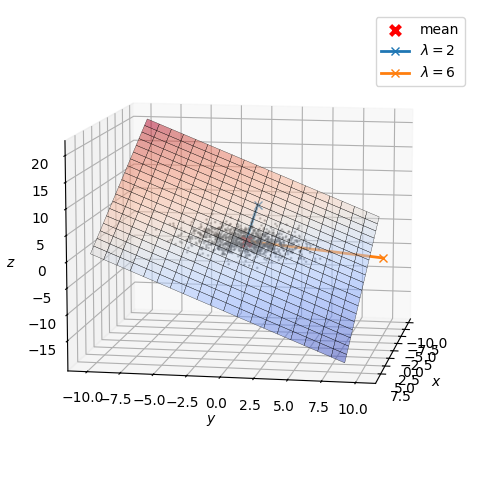

In [4]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8, 6))
xx, yy = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))
zz = subspace(xx, yy)  # the plane x+y+z=0
ax.plot_surface(xx, yy, zz, linewidth=0.2,
                edgecolor='k', # plots grids
                alpha=0.5,
                cmap=cm.coolwarm)

# plot other points
# ax.scatter(points[:,0], points[:, 1], points_z, color='k') # random points, no relation with the mean

# plot the mean point on the plane
# shift = np.ones(3) * 2 # one particular solution for x+y+z=b
shift = np.zeros(3)
# A = np.array([[-1., -1], [0, 1], [1, 0]]) # basis vector matrix for the plane x+y+z=0
A = np.array([[-1., -1], [0, 2], [1, -1]]) # orthogonal basis vector matrix for the plane x+y+z=0
mean = np.zeros(2)
mean = A @ mean + shift
ax.scatter(mean[0], mean[1], mean[2], marker='x', linewidth=10, s=5, color='r', label='mean')


# cov = np.array([[1, -0.7], [-0.7, 1]])
# cov = np.array([[5, 0.], [0., 1]])
cov = np.eye(2)
Z = np.random.multivariate_normal(np.zeros(2), cov, size=(1000, ))
points = (A @ Z.T).T + shift
ax.scatter(points[:, 0], points[:, 1], points[:, 2], alpha=0.3, s=1, color='k')




ax.view_init(elev=10, azim=10)

# plot the eigenvectors/basis vectors on the plane, note that here basis vectors is a subset of eigen vectors as colspace(A)=colspace(AA^T)
zero3 = np.zeros(3)
e1, e2 = (A@np.linalg.eig(cov).eigenvectors.T).T  # same as 2 vectors from A as here cov=I
x1, y1, z1 = np.vstack([zero3, e1])[:, 0], np.vstack([zero3, e1])[:, 1], np.vstack([zero3, e1])[:, 2]
x2, y2, z2 = np.vstack([zero3, e2])[:, 0], np.vstack([zero3, e2])[:, 1], np.vstack([zero3, e2])[:, 2]

ax.plot(5*x1, 5*y1, zs=5*z1, linewidth=2, marker = 'x', label=r'$\lambda=2$')
ax.plot(5*x2, 5*y2, zs=5*z2, linewidth=2, marker = 'x', label=r'$\lambda=6$')

ax.set_xlabel(r'$x$'); ax.set_ylabel(r'$y$'); ax.set_zlabel(r'$z$'); ax.legend()

# ax.plot(5*X1, 5*Y1, zs=5*Z1, linewidth=2, marker = 'x')
# ax.plot(5*X2, 5*Y2, zs=5*Z2, linewidth=2, marker = 'x')
# ax.plot(5*X3, 5*Y3, zs=5*Z3, linewidth=2, marker = 'x')

def animate(i):
    ax.view_init(elev=10, azim=3*i)  # every frame it moves 3 degrees
    
    
# ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
# ani.save('plane.gif', writer='pillow', fps=10, dpi=100)




plt.show()

In [440]:
mean

array([0., 0., 0.])

In [441]:
A

array([[-1., -1.],
       [ 0.,  2.],
       [ 1., -1.]])

In [438]:
x1, y1,z1, x2, y2, z2

(array([ 0., -1.]),
 array([0., 0.]),
 array([0., 1.]),
 array([ 0., -1.]),
 array([0., 2.]),
 array([ 0., -1.]))

In [231]:
mean

array([2., 2., 2.])

In [198]:
A

array([[-1., -1.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [499]:
cov = np.array([[1, 0.7], [0.7, 1]])

cov = np.array([[6, 0.], [0., 2]])
# cov = np.array([[3, -2.], [-2., 3]])

Z = np.random.multivariate_normal(np.zeros(2), cov, size=(1000, ))

In [500]:
e1, e2 = 5*np.linalg.eig(cov).eigenvectors
zero = np.zeros_like(e1)
e1, e2, zero

(array([5., 0.]), array([0., 5.]), array([0., 0.]))

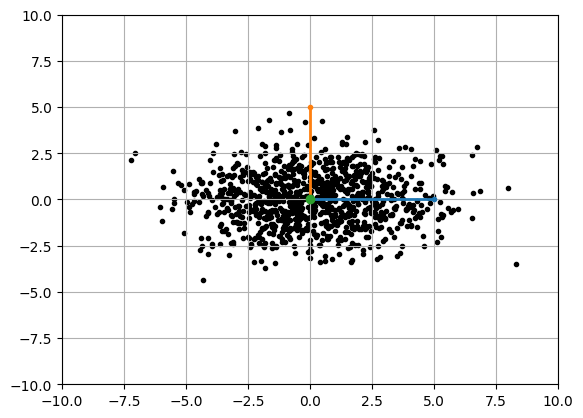

In [501]:
plt.scatter(Z[:, 0], Z[:, 1], marker='.', color='k')
plt.xlim(-10, 10); plt.ylim(-10,10)

x1, y1 = np.vstack([zero, e1])[:, 0], np.vstack([zero, e1])[:, 1]
x2, y2 = np.vstack([zero, e2])[:, 0], np.vstack([zero, e2])[:, 1]

plt.plot(x1, y1, linewidth=2, marker = '.')
plt.plot(x2, y2, linewidth=2, marker='.')
plt.plot([0], [0], linewidth=2, marker='o')

plt.grid()

In [452]:
(A @ Z.T).T

array([[ 1.44715346,  0.18088256, -1.62803602],
       [-0.39424716, -0.51726067,  0.91150783],
       [-0.35575923,  1.29198199, -0.93622276],
       ...,
       [ 0.05076625,  1.35914191, -1.40990816],
       [ 1.11892006, -1.78167743,  0.66275737],
       [-0.99999273, -0.01952997,  1.01952271]])

In [383]:
cov

array([[5., 0.],
       [0., 1.]])

In [384]:
np.linalg.eigvals(cov)

array([5., 1.])

In [385]:
np.linalg.eig(cov).eigenvectors

array([[1., 0.],
       [0., 1.]])

In [386]:
(A@np.linalg.eig(cov).eigenvectors.T).T

array([[-1.,  0.,  1.],
       [-1.,  1.,  0.]])

In [387]:
np.linalg.eig(A @ A.T).eigenvalues

array([ 3.0000000e+00, -3.3182225e-16,  1.0000000e+00])

In [406]:
np.linalg.eig(A @ A.T).eigenvectors

array([[ 8.16496581e-01, -5.77350269e-01,  1.57009246e-16],
       [-4.08248290e-01, -5.77350269e-01, -7.07106781e-01],
       [-4.08248290e-01, -5.77350269e-01,  7.07106781e-01]])

In [459]:
COV = A@A.T
COV

array([[ 2., -2.,  0.],
       [-2.,  4., -2.],
       [ 0., -2.,  2.]])

In [460]:
np.linalg.matrix_rank(COV)

2

In [465]:
np.linalg.eig(COV)

EigResult(eigenvalues=array([ 6.0000000e+00,  2.0000000e+00, -1.2345128e-16]), eigenvectors=array([[-4.08248290e-01, -7.07106781e-01,  5.77350269e-01],
       [ 8.16496581e-01,  3.06694063e-16,  5.77350269e-01],
       [-4.08248290e-01,  7.07106781e-01,  5.77350269e-01]]))

In [466]:
E1, E2, E3 = np.linalg.eig(COV).eigenvectors
E1, E2, E3

(array([-0.40824829, -0.70710678,  0.57735027]),
 array([8.16496581e-01, 3.06694063e-16, 5.77350269e-01]),
 array([-0.40824829,  0.70710678,  0.57735027]))

In [471]:
U, S, VT = np.linalg.svd(COV)

In [484]:
S

array([6.00000000e+00, 2.00000000e+00, 1.35063069e-16])

In [488]:
np.around(U, 2)/0.41

array([[-1.        , -1.73170732,  1.41463415],
       [ 2.        , -0.        ,  1.41463415],
       [-1.        ,  1.73170732,  1.41463415]])

In [476]:
U @ np.diag(S) @ VT

array([[ 2.00000000e+00, -2.00000000e+00, -3.97823530e-16],
       [-2.00000000e+00,  4.00000000e+00, -2.00000000e+00],
       [-2.21765868e-16, -2.00000000e+00,  2.00000000e+00]])

In [467]:
A

array([[-1., -1.],
       [ 0.,  2.],
       [ 1., -1.]])

In [468]:
A

array([[-1., -1.],
       [ 0.,  2.],
       [ 1., -1.]])

In [469]:
e1, e2

(array([-1.,  0.,  1.]), array([-1.,  2., -1.]))

In [394]:
zero3 = np.zeros(3)
e1, e2 = (A@np.linalg.eig(cov).eigenvectors.T).T
np.vstack([zero3, e1])

array([[ 0.,  0.,  0.],
       [-1.,  0.,  1.]])

In [392]:
x1, y1, z1 = np.vstack([zero3, e1])[:, 0], np.vstack([zero3, e1])[:, 1], np.vstack([zero3, e1])[:, 2]

In [393]:
zero3 = np.zeros(3)
e1, e2 = (A@np.linalg.eig(cov).eigenvectors.T).T
x1, y1, z1 = np.vstack([zero3, e1])[:, 0], np.vstack([zero3, e1])[:, 1], np.vstack([zero3, e1])[:, 2]
x2, y2, z2 = np.vstack([zero3, e2])[:, 0], np.vstack([zero3, e2])[:, 1], np.vstack([zero3, e2])[:, 2]

In [418]:
E1, E2, E3 = np.linalg.eig(COV).eigenvectors
X1, Y1, Z1 = np.vstack([zero3, E1])[:, 0], np.vstack([zero3, E1])[:, 1], np.vstack([zero3, E1])[:, 2]
X2, Y2, Z2 = np.vstack([zero3, E2])[:, 0], np.vstack([zero3, E2])[:, 1], np.vstack([zero3, E2])[:, 2]
X3, Y3, Z3 = np.vstack([zero3, E3])[:, 0], np.vstack([zero3, E3])[:, 1], np.vstack([zero3, E3])[:, 2]

In [495]:
# 3*A@np.linalg.inv(A.T@A)@A.T

In [498]:
A@A.T

array([[ 2., -2.,  0.],
       [-2.,  4., -2.],
       [ 0., -2.,  2.]])

In [559]:
n1 = np.sqrt(2)
n2 = np.sqrt(6)
n1, n2 = 1,1

A = np.column_stack([1/n1*np.array([-1, 0, 1.]), 1/n2*np.array([-1., 2., -1])])
A

U, S, VT = np.linalg.svd(A@A.T)

In [560]:
A

array([[-1., -1.],
       [ 0.,  2.],
       [ 1., -1.]])

In [561]:
np.around(U, 2)

array([[-0.41, -0.71,  0.58],
       [ 0.82, -0.  ,  0.58],
       [-0.41,  0.71,  0.58]])

In [562]:
U@U.T

array([[ 1.00000000e+00,  4.23967870e-16, -2.01213401e-17],
       [ 4.23967870e-16,  1.00000000e+00,  9.09009624e-17],
       [-2.01213401e-17,  9.09009624e-17,  1.00000000e+00]])

In [563]:
S

array([6.00000000e+00, 2.00000000e+00, 1.35063069e-16])

In [564]:
U @ np.diag(S) @ VT

array([[ 2.00000000e+00, -2.00000000e+00, -3.97823530e-16],
       [-2.00000000e+00,  4.00000000e+00, -2.00000000e+00],
       [-2.21765868e-16, -2.00000000e+00,  2.00000000e+00]])

## generating orthogonal noise

In [581]:
B = np.array([1, 1, 1]).reshape(-1, 1) # w normal vector of plane
D = B@B.T # degenerate covariance matrix for the gaussian
U, S, VT = np.linalg.svd(D)
np.around(S, 2), np.around(U,2)

(array([3., 0., 0.]),
 array([[-0.58,  0.82, -0.  ],
        [-0.58, -0.41, -0.71],
        [-0.58, -0.41,  0.71]]))

In [582]:
D

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [595]:
D@U[:, 0], 3*U[:,0]

(array([-1.73205081, -1.73205081, -1.73205081]),
 array([-1.73205081, -1.73205081, -1.73205081]))

In [583]:
e = np.random.normal(loc=0.0, scale=1.0, size=(10, )).reshape(1, -1)
e

array([[-0.05915968, -0.88535913, -1.96515234, -1.09215692,  1.94347499,
         2.36883259, -0.35694964,  0.09030969, -0.96623383, -0.00991477]])

In [585]:
(B@e).T # all along w

array([[-0.05915968, -0.05915968, -0.05915968],
       [-0.88535913, -0.88535913, -0.88535913],
       [-1.96515234, -1.96515234, -1.96515234],
       [-1.09215692, -1.09215692, -1.09215692],
       [ 1.94347499,  1.94347499,  1.94347499],
       [ 2.36883259,  2.36883259,  2.36883259],
       [-0.35694964, -0.35694964, -0.35694964],
       [ 0.09030969,  0.09030969,  0.09030969],
       [-0.96623383, -0.96623383, -0.96623383],
       [-0.00991477, -0.00991477, -0.00991477]])